In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from string import punctuation
import json

In [2]:
file = '004_human_set_3000.csv'

data = pd.read_csv(file, comment='#')

print(data.shape)
data.head(5)

(2895, 2)


,word,defs
0,абажур,верхняя часть лампы
1,абажур,часть лампы
2,абонемент,"это карточка, которая позволяет тебе ходить в ..."
3,абрикос,маленький оранжевый фрукт
4,абрикос,фрукт


In [3]:
import spacy

nlp = spacy.load('ru2')
nlp.add_pipe(nlp.create_pipe('sentencizer'), first=True)

In [4]:
entries = ['POS', 'freq', 'example', 'isBigram']

frequences = {}
examples = {}
isBigram = {}

for sentence in data['defs']:
    text = ''.join(x for x in sentence if x not in punctuation)
    doc = nlp(text)
    for i in range(len(doc)):
        word = doc[i]
        pos_tag = word.pos_
        if pos_tag not in frequences:
            examples[pos_tag] = word.lemma_
            isBigram[pos_tag] = False
        frequences[pos_tag] = frequences[pos_tag] + 1 if pos_tag in frequences else 1
        j = i + 1
        if j < len(doc):
            bigram_pos_tag = pos_tag + "+" + doc[j].pos_
            if bigram_pos_tag not in frequences:
                examples[bigram_pos_tag] = word.lemma_ + " " + doc[j].lemma_
                isBigram[bigram_pos_tag] = True
            frequences[bigram_pos_tag] = frequences[bigram_pos_tag] + 1 if bigram_pos_tag in frequences else 1

array = [[k, v, examples[k], isBigram[k]] for k,v in frequences.items()]
        
df = pd.DataFrame(data = array, columns = entries)
df_sorted = df.sort_values('freq', ascending=False)

In [5]:
df_sorted.head()

,POS,freq,example,isBigram
2,NOUN,4565,часть,False
0,ADJ,1350,верхний,False
11,ADP,1202,в,False
8,VERB,1062,позволять,False
1,ADJ+NOUN,902,верхний часть,True


In [6]:
df_sorted = df_sorted.loc[df_sorted['POS'] != 'SPACE']
print(df_sorted.shape)

(146, 4)


In [7]:
df_sorted.head(10)

,POS,freq,example,isBigram
2,NOUN,4565,часть,False
0,ADJ,1350,верхний,False
11,ADP,1202,в,False
8,VERB,1062,позволять,False
1,ADJ+NOUN,902,верхний часть,True
12,ADP+NOUN,848,в бассейн,True
3,NOUN+NOUN,746,часть лампа,True
21,NOUN+ADP,660,раз за,True
4,PRON,568,это,False
34,VERB+NOUN,360,переносить самолёт,True


In [8]:
data_pos = df_sorted.loc[df_sorted['isBigram'] == False]
data_bigram_pos = df_sorted.loc[df_sorted['isBigram'] == True]

In [9]:
data_pos.head()

,POS,freq,example,isBigram
2,NOUN,4565,часть,False
0,ADJ,1350,верхний,False
11,ADP,1202,в,False
8,VERB,1062,позволять,False
4,PRON,568,это,False


In [10]:
data_bigram_pos.head(20)

,POS,freq,example,isBigram
1,ADJ+NOUN,902,верхний часть,True
12,ADP+NOUN,848,в бассейн,True
3,NOUN+NOUN,746,часть лампа,True
21,NOUN+ADP,660,раз за,True
34,VERB+NOUN,360,переносить самолёт,True
7,PRON+VERB,313,которая позволять,True
10,VERB+ADP,281,ходить в,True
49,NOUN+VERB,222,книга учить,True
22,ADJ+ADJ,155,маленький оранжевый,True
23,NOUN+ADJ,155,фрукт похожий,True


Расшифровка названий частей речи:

In [11]:
pos_tags = ["NOUN", "ADJ", "ADP", "VERB", "CCONJ", "PRON", "ADV", "DET", "NUM", "PROPN", "SCONJ", "X", "AUX"]

for tag in pos_tags:
    print(tag, spacy.explain(tag))

NOUN noun
ADJ adjective
ADP adposition
VERB verb
CCONJ coordinating conjunction
PRON pronoun
ADV adverb
DET determiner
NUM numeral
PROPN proper noun
SCONJ subordinating conjunction
X other
AUX auxiliary


# Построение гистограмм частот различных частей речи

Сначала построим гистограмму для отдельных слов:

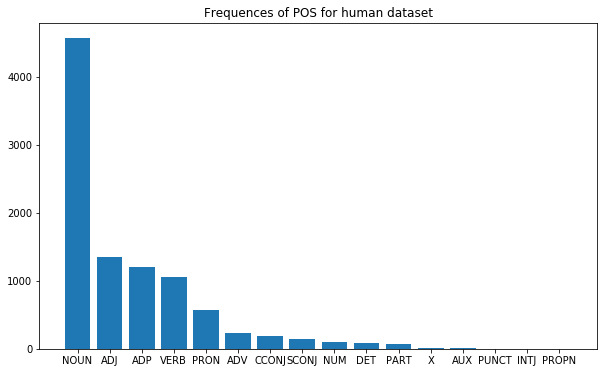

In [12]:
x = data_pos['POS']
y = data_pos['freq']

fig, ax = plt.subplots()

plt.title('Frequences of POS for human dataset')

ax.bar(x, y)

fig.set_figwidth(10)
fig.set_figheight(6)

plt.show()

Теперь для биграмм:

In [13]:
data_bigram_pos.shape

(130, 4)

In [14]:
np.percentile(data_bigram_pos['freq'], 85)

54.44999999999989

In [15]:
data_bigram_pos = data_bigram_pos.loc[data_bigram_pos['freq'] >= 55]

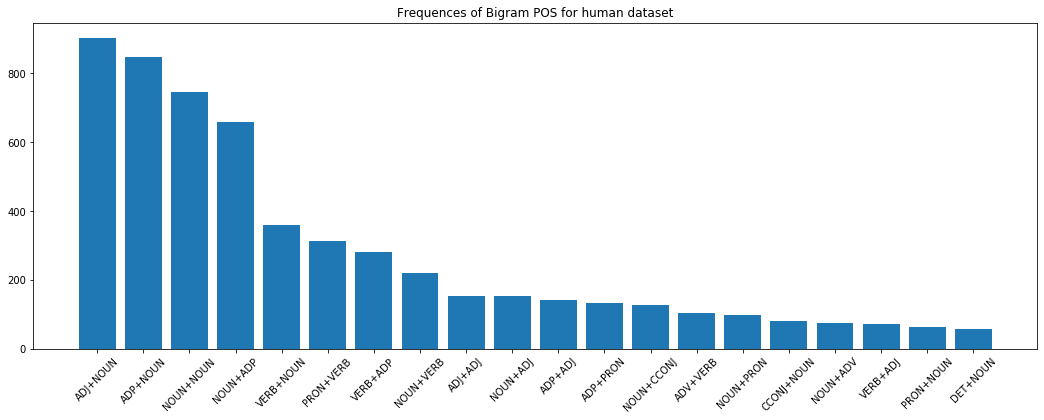

In [16]:
x = data_bigram_pos['POS']
y = data_bigram_pos['freq']

fig, ax = plt.subplots()

plt.title('Frequences of Bigram POS for human dataset')

ax.bar(x, y)

ax.set_xticklabels(x, rotation = 45)  

fig.set_figwidth(18)
fig.set_figheight(6)

plt.show()